In [2]:
!pip install kats


     |████████████████████████████████| 6.3 MB 5.4 MB/s 
     |████████████████████████████████| 815 kB 31.7 MB/s 
     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 498 kB 45.8 MB/s 
     |████████████████████████████████| 3.4 MB 29.8 MB/s 
     |████████████████████████████████| 20.6 MB 5.4 MB/s 
     |████████████████████████████████| 9.5 MB 40.4 MB/s 
     |████████████████████████████████| 25.3 MB 58 kB/s 
     |████████████████████████████████| 475 kB 43.1 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286608 sha256=609030ef919b8cd09933e72a1fae5bfb9e264c8099cdf86e47d75c7eaa6bfca9
  Stored in directory: /root/.cache/pip/wheels/c8/dd/5b/cc7cb7fc37c5b838c65e504437bba4c1828a3fbb473c0c11be
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-none-any.whl size=6635487 sha256=b74263d0133afa0bcdd1a453a1a8768069777ba0a34d0c98b5734b25e0e9b582
  Stored in directory: /root/.cache/pip/wheels/82/e8/a8/53f37f0a409bc51f

**Initiate TimeSeriesData**

In [9]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

In [10]:
TimeSeriesData?

In [11]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers (1).csv


In [14]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']))
df.dtypes


Month          object
#Passengers     int64
dtype: object

In [35]:

df.columns = ["time", "value"]
df.head()

,time,value
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [36]:
df.describe()

,value
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [37]:
# Init with pd.DataFrame with col `time`
ts = TimeSeriesData(df.rename({"Month": "time"}, axis=1))
ts[:5]

,time,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [23]:
from google.colab import files
uploaded = files.upload()

Saving multi_ts.csv to multi_ts.csv


In [27]:
import io
multi_ts_df = pd.read_csv(io.BytesIO(uploaded['multi_ts.csv']))
multi_ts_df.head()

,Unnamed: 0,time,V1,V2
0,0,2017-03-12,-0.109,53.8
1,1,2017-03-13,0.000,53.6
2,2,2017-03-14,0.178,53.5
3,3,2017-03-15,0.339,53.5
4,4,2017-03-16,0.373,53.4


In [33]:
multi_ts_df.columns = [0,"time", "v1", "v2"]


In [38]:

air_passengers_ts = TimeSeriesData(df)
multi_ts = TimeSeriesData(multi_ts_df)

In [39]:
print(type(air_passengers_ts))
print(type(multi_ts))

<class 'kats.consts.TimeSeriesData'>
<class 'kats.consts.TimeSeriesData'>


In [40]:
# For the air_passengers TimeSeriesData, check that both time and value are pd.Series
print(type(air_passengers_ts.time))
print(type(air_passengers_ts.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [41]:

# For the multi_ts TimeSeriesData, time is a pd.Series and value is a pd.DataFrame
print(type(multi_ts.time))
print(type(multi_ts.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [42]:
air_passengers_ts_from_series = TimeSeriesData(time=df.time, value=df.value)
multi_ts_from_series = TimeSeriesData(time=multi_ts_df.time, value=multi_ts_df[['v1', 'v2']])

In [43]:
from dateutil import parser
from datetime import datetime

# Convert time from air_passengers data to unix time
air_passengers_ts_unixtime = df.time.apply(
    lambda x: datetime.timestamp(parser.parse(x)))

air_passengers_ts_unixtime

0     -660700800.0
1     -658022400.0
2     -655603200.0
3     -652924800.0
4     -650332800.0
          ...     
139   -295228800.0
140   -292550400.0
141   -289958400.0
142   -287280000.0
143   -284688000.0
Name: time, Length: 144, dtype: float64

In [44]:
# Create the TimeSeriesData object with the extra arguments to accomodate unix time 
ts_from_unixtime = TimeSeriesData(
        time=air_passengers_ts_unixtime, 
        value=air_passengers_df.value, 
        use_unix_time=True, 
        unix_time_units="s"
)

ts_from_unixtime

,time,value
0,1949-01-24,112
1,1949-02-24,118
2,1949-03-24,132
3,1949-04-24,129
4,1949-05-24,121
...,...,...
139,1960-08-24,606
140,1960-09-24,508
141,1960-10-24,461
142,1960-11-24,390


In [45]:
#Slicing
air_passengers_ts[1:5]

,time,value
0,1949-02-01,118
1,1949-03-01,132
2,1949-04-01,129
3,1949-05-01,121


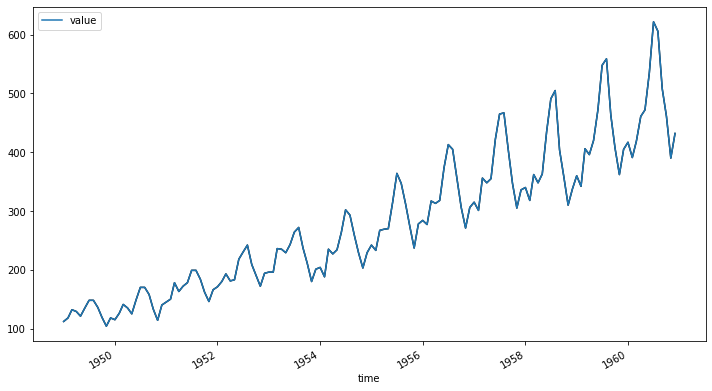

In [46]:
%matplotlib inline

# Must pass the name of the value columns to plot
air_passengers_ts.plot(cols=['value'])
plt.show()

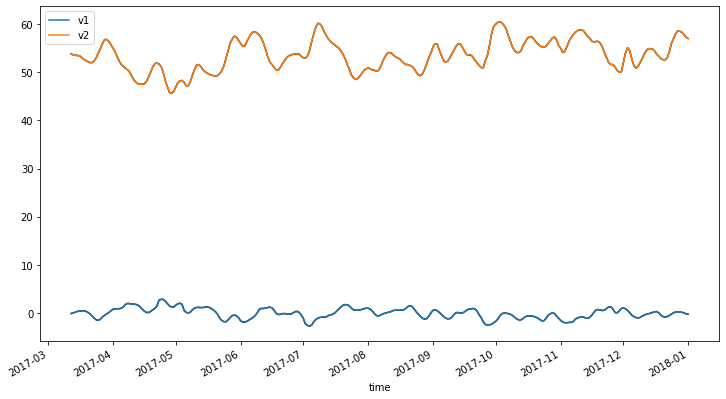

In [47]:
# We can plot multiple time series from multi_ts by passing in the name of each value column we want to plot
multi_ts.plot(cols=['v1','v2'])
plt.show()

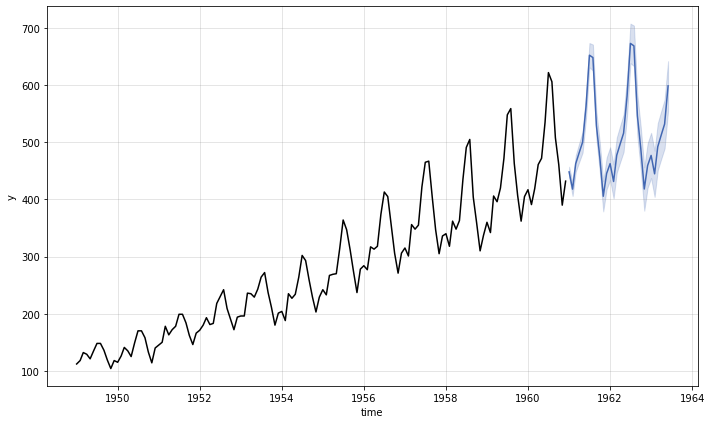

In [48]:
#Theta model
# import param and model from `kats.models.theta`
from kats.models.theta import ThetaModel, ThetaParams

# create ThetaParam with specifying seasonality param value
params = ThetaParams(m=12)

# create ThetaModel with given data and parameter class
m = ThetaModel(data=air_passengers_ts, params=params)

# call fit method to fit model
m.fit()

# call predict method to predict the next 30 steps
res = m.predict(steps=30, alpha=0.2)

# visualize the results
m.plot()